In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

markers = ['p', '+', '3', '^', '*','v','h','x','d']

In [2]:
def rk4(f,a,b,x0,N):
    h = (b-a)/(N+1)
    t = np.arange(a,b+h,h)
    x = [x0]
    for i in range(1,len(t)):
        k1 = h*f(t[i-1],x[i-1])
        k2 = h*f(t[i-1]+h/2,x[i-1]+k1/2)
        k3 = h*f(t[i-1]+h/2,x[i-1]+k1/2)
        k4 = h*f(t[i-1]+h,x[i-1]+k1)
        x.append(x[i-1]+(k1+2*k2+2*k3+k4)/6)
    return t,np.array(x)

def tol_rk4(f,a,b,x0,N_max,tol):
    N = 4
    while True:
        t,I0 = rk4(f,a,b,x0,N)
        N *= 2
        t,I1 = rk4(f,a,b,x0,N)
        
        if (np.abs(I1[-1]-I0[-1]) < np.ones_like(I1)*tol).all():
            break
        elif 2*N >= N_max:
            print('N max reached without reaching tolerence.')
            break
    return N,t,I1

In [3]:
def normalize(x,y):
    y_norm = []
    for i in range(np.shape(y)[1]):
        y_i = y[:,i]
        y_i_norm = y_i/np.sqrt(integrate.simpson(y_i**2,x))
        y_norm.append(y_i_norm)

    return np.array(y_norm).T

In [4]:
def deriv_f(t,X=np.array([0,0])):
    dx1 = X[1]
    dx2 = (V(X[0])-E)*X[0]
    return np.array([dx1,dx2])

# def V(x):
#     if np.abs(x) < 1:
#         return 0
#     else:
#         return np.inf

def V(x):
    return 0 #Only 0 because we are only simulating for -1/2 to 1/2

V = np.vectorize(V)

f_analytical = lambda x: np.sqrt(2)*np.cos(1*np.pi*x)

In [5]:
def guess(Ei,x2_BC,norm=True):
    X0 = np.array([0,x2_BC])
    
    global E # making E variable global. Otherwise E is not updating 
    E = Ei
    
    n,X,Y = tol_rk4(deriv_f,-1/2,1/2,X0,1e6,1e-2)
    if norm: Y = normalize(X,Y)
    
    plt_n = 2
    fig, ax = plt.subplots(plt_n, 1, figsize=(8, 10))
    
    ax[0].title.set_text(f'$E={E},u_{1_0}={X0[0]},u_{2_0}={X0[1]}$')
    
    for i in range(plt_n):
        y_lbl = f'$u_{i+1}$'
        ax[i].plot(X,Y[:,i],'+',label='RK4')
        ax[i].set_xlabel('x')
        ax[i].set_ylabel(y_lbl)
        ax[i].legend()
        ax[i].grid(True)
        
    ax[0].plot(X,f_analytical(X),label='Analytical')
    ax[0].legend()
    plt.show()

In [6]:
def multiple_u2(E,u2_0_list,norm=True):
    plt_n = 2
    fig, ax = plt.subplots(plt_n, 1, figsize=(8, 10))
        
    for j in range(len(u2_0_list)):
        X0 = np.array([0,u2_0_list[j]])
        
        E = E

        n,X,Y = tol_rk4(deriv_f,-1/2,1/2,X0,1e6,1e-2)
        X = np.array(X)
        Y = np.array(Y)
        
        if norm: Y = normalize(X,Y)
        
        ax[0].title.set_text(f'$E={E},u_{1_0}={X0[0]}$')
        for i in range(plt_n):
            y_lbl = f'$u_{i+1}$'
            
            line_lbl = f'$u_{2_0}={np.round(X0[1],2)}$'
            
            ax[i].plot(X,Y[:,i],markers[j],label=line_lbl)
            ax[i].set_xlabel('x')
            ax[i].set_ylabel(y_lbl)
            ax[i].legend()
            ax[i].grid(True)
    plt.show()

In [7]:
def multiple_E(E_list,u2_0,norm=True):
    plt_n = 2
    fig, ax = plt.subplots(plt_n, 1, figsize=(8, plt_n*5))
        
    for j in range(len(E_list)):
        X0 = np.array([0,u2_0])
        global E 
        E = E_list[j]
        
        n,X,Y = tol_rk4(deriv_f,-1/2,1/2,X0,1e6,1e-2)
        
        if norm: Y = normalize(X,Y)
        
        ax[0].title.set_text(f'$u_{1_0}={X0[0]},u_{2_0}={X0[1]}$')
        for i in np.arange(plt_n):
            y_lbl = f'$u_{i+1}$'
            
            line_lbl = f'$E={np.round(E,2)}$'
            
            ax[i].plot(X,Y[:,i],markers[j],label=line_lbl)
            ax[i].set_xlabel('x')
            ax[i].set_ylabel(y_lbl)
            ax[i].legend()
            ax[i].grid(True)
    plt.show()

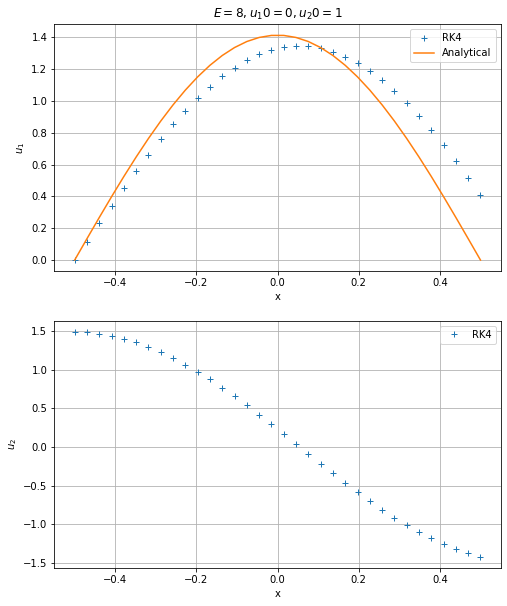

In [8]:
# 1(b)

guess(8,1)

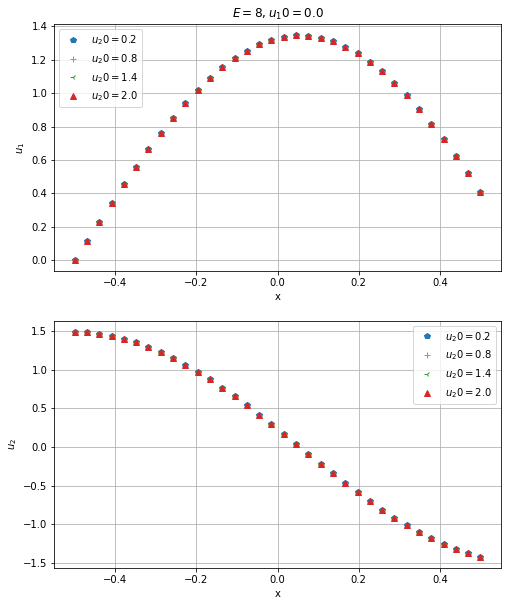

In [9]:
# 1(c)

u2_0_list1 = np.linspace(0.2,2,4)
E1 = 8

multiple_u2(E1,u2_0_list1,True)

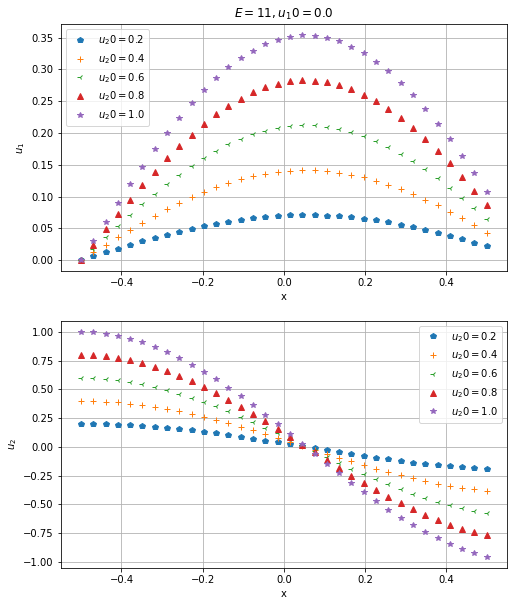

In [10]:
u2_0_list1 = np.linspace(0.2,1,5)
E1 = 11

multiple_u2(E1,u2_0_list1,False)

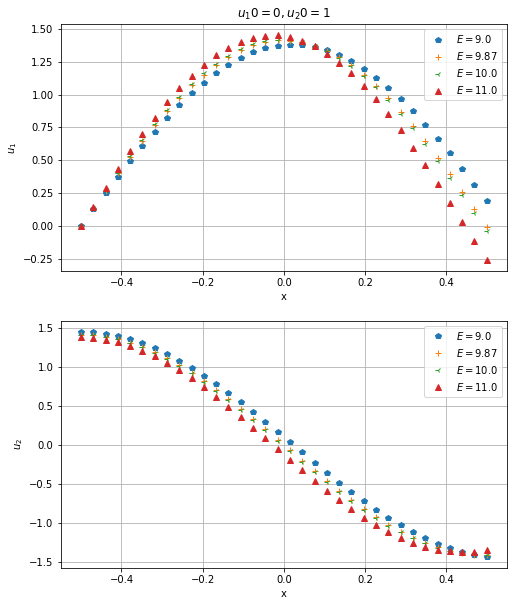

In [11]:
# 1(d)

# E_list1 = np.linspace(np.pi**2-1,np.pi**2+1,5)
E_list1 = np.array([9,np.pi**2,10,11])
u2_01 = 1

multiple_E(E_list1,u2_01)

In [12]:
# 1(e)

def find_E(X0,E_start,E_end,h,tol):
    global E
    
    E_list = np.arange(E_start,E_end+h,h)
    itr = 0
    
    tol_RK = tol
    
    E = E_list[itr]
    n,X,Y = tol_rk4(deriv_f,-1/2,1/2,X0,1e8,tol_RK)

    while np.abs(Y[-1,0]) >= tol:
        itr += 1
#         print(np.abs(Y[-1,0]),E)
        print('I',end='')
    
        if itr >= len(E_list):
            h *= 0.5
            E_list = np.arange(E_start,E_end+h,h)
            itr = 0
#             print('\n','*'*10)
#             print(h)
        
        E = E_list[itr]
        n,X,Y = tol_rk4(deriv_f,-1/2,1/2,X0,1e8,tol_RK)
    Y = normalize(X,Y)
    return E,X,Y

IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

e (numerical)= 9.862643960980401
e (analytical)= 9.869604401089358


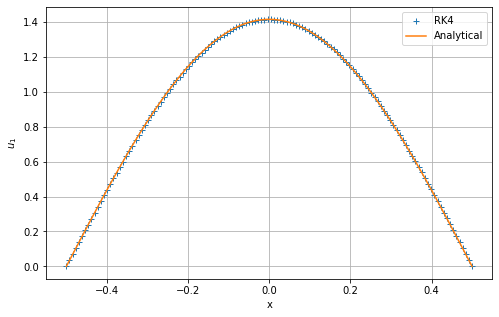

In [20]:
e,x,y = find_E([0,1],0.9*np.pi**2,1.1*np.pi**2,1e-2,0.5e-3)

print('\n\ne (numerical)=',e)
print('e (analytical)=',np.pi**2)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
plt.plot(x,y[:,0],'+',label='RK4')
plt.plot(x,f_analytical(x),label='Analytical')
plt.xlabel('x')
plt.ylabel(r'$u_1$')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# energy eigenvalue in eV for electron trapped in a well of width 2 angstrom
h_bar = 1.056e-34
m = 9.109e-31
L = 2e-10
eV = 1.602e-19

E_electron = np.pi**2*h_bar**2/(2*m*L**2)/eV
print(f'Ground state energy of electron in infinite potential well of width 2 Angstrom = {E_electron} eV')

Ground state energy of electron in infinite potential well of width 2 Angstrom = 9.427670186916753 eV
